In [2]:
import pandas as pd

In [3]:
path = "resources/traffic_collision.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df["Date Occurred"] = pd.to_datetime(df["Date Occurred"])

In [6]:
df = df[["Date Occurred", "Time Occurred"]]

In [7]:
df.head()

,Date Occurred,Time Occurred
0,2019-07-13,930
1,2019-07-13,1135
2,2019-07-13,1310
3,2019-07-13,1230
4,2019-07-13,800


In [8]:
def to_minutes(time):
    if time >= 100:
        return 60 * (time // 100) + (time % 100)
    else:
        return time

In [9]:
df["Time Occurred"] = df["Time Occurred"].map(to_minutes)

In [10]:
def round_30_min(time):
    if time < 1425:
        if time % 30 < 15:
            return time - (time % 30)
        else:
            return time + (30 - time % 30)
    else:
        return 0

In [15]:
times = df["Time Occurred"].map(round_30_min)
# times = df[df["Time Occurred"] % 30 == 0]["Time Occurred"]

In [16]:
plot_values = times.value_counts()

In [17]:
plot_values

1080    17064
1050    16283
1020    15985
960     15877
900     15744
930     15149
1110    15128
990     14780
1140    14596
840     14260
870     14051
480     13914
780     13440
720     13199
810     12955
750     12595
1170    12288
1200    12074
540     11025
660     10970
1260    10923
690     10899
510     10889
600     10788
1230    10597
450     10073
630     10056
1320     9855
1290     9839
570      9597
0        8767
1380     8524
1350     8472
420      7230
1410     6791
120      6637
60       6045
30       5443
150      5312
180      4948
90       4935
390      4575
360      4014
210      3191
240      3015
330      2786
300      2726
270      2250
Name: Time Occurred, dtype: int64

In [18]:
import matplotlib.pyplot as plt

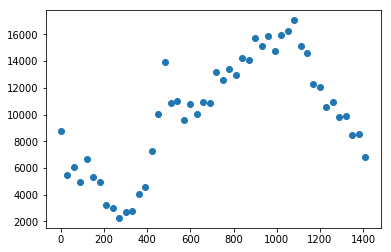

In [38]:
plt.scatter(plot_values.index, plot_values)

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

In [40]:
X = np.array(plot_values.index).reshape(-1,1)
y = plot_values.values

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .3)

In [23]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [24]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [45]:
X_sort = X.reshape(-1)
X_sort = np.sort(X_sort)
X_sort = X_sort.reshape(-1,1)

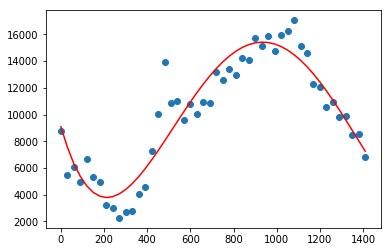

In [48]:
plt.scatter(X, y)
plt.plot(X_sort, model.predict(poly.fit_transform(X_sort)), color="red")

In [205]:
model.score(X_test_poly, y_test)

0.9141028001112861

In [206]:
model.score(X_train_poly, y_train)

0.8359880855342388